In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from prophet import Prophet

plt.rcParams['figure.constrained_layout.use'] = True # 自动约束布局

In [21]:
df = pd.read_csv("data_preprocessed(特征未归一化).csv")
df.Date = pd.to_datetime(df.Date)

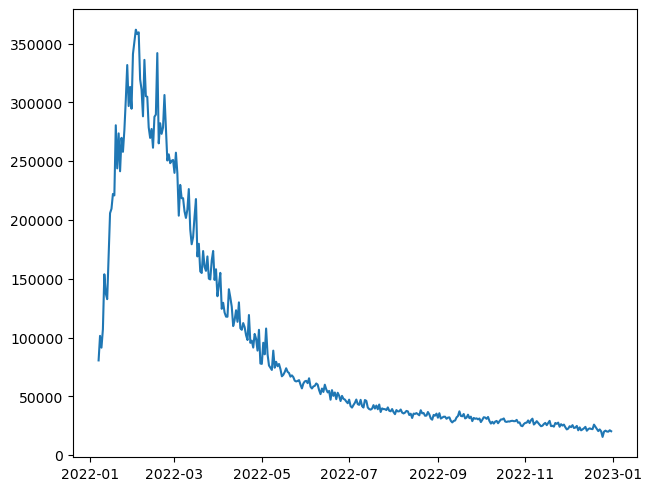

In [23]:
plt.plot(df['Date'], df['Number of  reported results'])

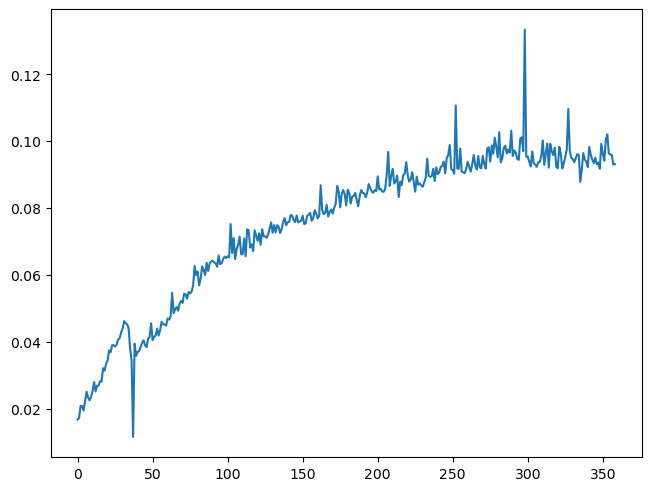

In [24]:
hard_counts = df['Number in hard mode'].values.copy()
all_counts = df['Number of  reported results'].values.copy()

plt.plot(hard_counts/all_counts)

In [25]:
ts = pd.DataFrame([df.Date.values, hard_counts/all_counts]).T
ts.columns = ['ds', 'y']

In [26]:
ts

,ds,y
0,2022-01-07,0.016892
1,2022-01-08,0.017369
2,2022-01-09,0.020912
3,2022-01-10,0.020927
4,2022-01-11,0.019606
...,...,...
354,2022-12-27,0.096365
355,2022-12-28,0.096081
356,2022-12-29,0.095945
357,2022-12-30,0.093048


In [27]:
m = Prophet()
m.fit(ts)

09:49:12 - cmdstanpy - INFO - Chain [1] start processing
09:49:12 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
future = m.make_future_dataframe(periods=1)
forecast = m.predict(future)

d:\CodingEnv\mambaforge\envs\prophet\Lib\site-packages\prophet\plot.py:92: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


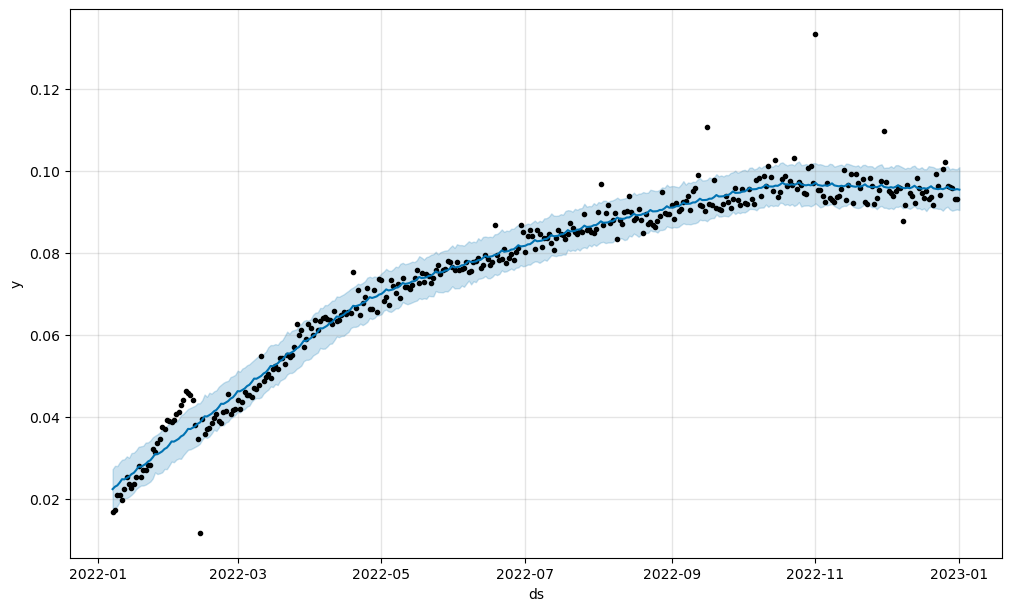

In [29]:
fig1 = m.plot(forecast)

d:\CodingEnv\mambaforge\envs\prophet\Lib\site-packages\prophet\plot.py:194: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


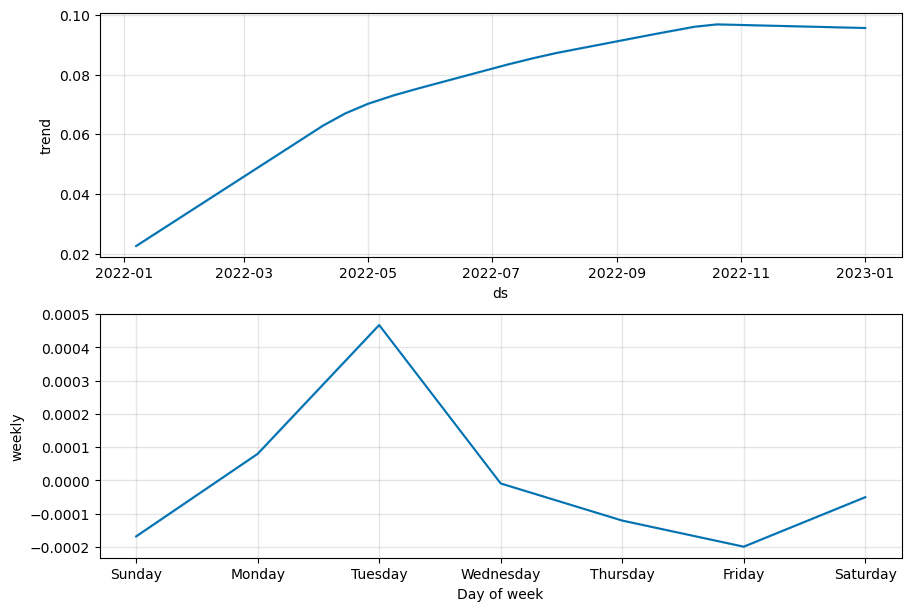

In [30]:
fig2 = m.plot_components(forecast)

In [31]:
dif = ts[ts.ds>='2022-03'].y - forecast[forecast.ds>='2022-03'].yhat[:-1]

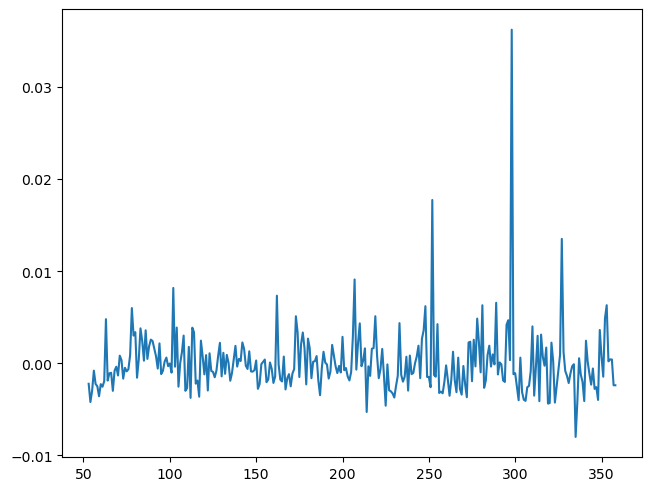

In [32]:
plt.plot(dif)

In [33]:
new_df = df[df.Date>='2022-03'].copy()

new_df['dif'] = dif

new_df.to_csv('1.2困难模式比例每日波动.csv', index=False)

In [36]:
new_df

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,...,o,i,th,he,in,er,an,Frequency,Char_repititions,dif
53,2022-03-01,255,rupee,240137,10577,1.000000,2.000000,17.000000,35.000000,30.000000,...,0,0,0,0,0,0,0,5.229968e-07,1,-0.002218
54,2022-03-02,256,nasty,257304,10813,1.010101,7.070707,26.262626,31.313131,21.212121,...,0,0,0,0,0,0,0,6.777080e-06,0,-0.004201
55,2022-03-03,257,mourn,240018,10465,1.000000,8.000000,29.000000,34.000000,19.000000,...,1,0,0,0,0,0,0,2.559808e-06,0,-0.002951
56,2022-03-04,258,ahead,203730,9396,0.990099,4.950495,19.801980,34.653465,25.742574,...,0,0,0,1,0,0,0,5.285724e-05,1,-0.000792
57,2022-03-05,259,brine,229895,10405,0.990099,8.910891,24.752475,28.712871,21.782178,...,0,1,0,0,1,0,0,1.660144e-06,0,-0.002239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-12-27,556,condo,20879,2012,0.000000,2.000000,17.000000,35.000000,29.000000,...,2,0,0,0,0,0,0,1.960344e-06,1,0.000222
355,2022-12-28,557,impel,20160,1937,0.000000,3.030303,21.212121,40.404040,25.252525,...,0,1,0,0,0,0,0,2.761370e-07,0,0.000432
356,2022-12-29,558,havoc,20001,1919,0.000000,2.000000,16.000000,38.000000,30.000000,...,1,0,0,0,0,0,0,2.419932e-06,0,0.000424
357,2022-12-30,559,molar,21204,1973,0.000000,4.040404,21.212121,38.383838,26.262626,...,1,0,0,0,0,0,0,3.081168e-06,0,-0.002378
